# Mono resistance EDA

In this POC, we gloss over the resistance towards distinct drugs and focus only on the mono-resistance.


In [69]:

from __future__ import print_function
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
pyplot.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set(font_scale=1.5)



def print_ln():
    print('-' * 80, '\n')


DATA_LOCATION  = "../../data/"

## EDA for Tb-profiler results

In [60]:
# Read data for ALL genomes in the cohort

tbprofiler_df = pd.read_json(DATA_LOCATION + "raw/cohort.tbprofiler.json", encoding="UTF-8")
tbprofiler_df = tbprofiler_df.transpose()
tbprofiler_df.head()


,rifampicin,isoniazid,pyrazinamide,ethambutol,streptomycin,fluoroquinolones,moxifloxacin,ofloxacin,levofloxacin,ciprofloxacin,...,cycloserine,linezolid,bedaquiline,clofazimine,delamanid,main_lin,sublin,drtype,MDR,XDR
SRR1162996,rpoB_p.His445Asp,"katG_p.Ser315Thr, fabG1_c.-15C>T",pncA_p.Asp49Gly,"embA_c.-12C>T, embB_p.Gln497Arg",rrs_r.514a>c,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,...,alr_p.Leu113Arg,-,-,-,-,lineage4,lineage4.3.3,XDR,R,R
SRR6356985,"rpoB_p.Ser450Leu, rpoC_p.Leu527Val","katG_p.Ser315Thr, fabG1_c.-15C>T",-,embB_p.Met306Ile,rpsL_p.Lys43Arg,-,-,-,-,-,...,-,-,-,-,-,lineage2,lineage2.2.1,MDR,R,
SRR10525347,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.1.2.1,Sensitive,,
SRR5153132,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.1.2.1,Sensitive,,
SRR10380131,rpoB_p.Ser450Leu,katG_p.Ser315Thr,-,embB_p.Met306Ile,rpsL_p.Lys43Arg,-,-,-,-,-,...,-,-,-,-,-,lineage2,lineage2.2.1,MDR,R,


In [61]:
tbprofiler_df.shape

(2654, 26)

In [62]:
# Select the train (Tb-portals) data

# Read the genomes IDs of genomes
# - Tb-portals (ALL/ Train)
# - HTBC (ALL/ Test)

import json

with open(DATA_LOCATION + "raw/test_train_genome_ids.json") as f:
    all_genomes_ids_dict = json.load(f)

final_tbportals_train_genome_ids =  all_genomes_ids_dict['final_tbportals_train_genomes']
final_htbc_test_genome_ids = all_genomes_ids_dict['final_htbc_test_genomes']


In [63]:
# Read the binarized tb_profiler results from step-002

binarized_resistance_status_df = pd.read_csv(DATA_LOCATION +  "processed/binarized_resistance_status_df.tsv", "\t").rename(columns={'Unnamed: 0' : 'SampleID'}).set_index('SampleID')

binarized_resistance_status_df.head(10)


,rifampicin_resistance,isoniazid_resistance,pyrazinamide_resistance,ethambutol_resistance,streptomycin_resistance,fluoroquinolones_resistance,moxifloxacin_resistance,ofloxacin_resistance,levofloxacin_resistance,ciprofloxacin_resistance,...,linezolid_resistance,bedaquiline_resistance,clofazimine_resistance,delamanid_resistance,main_lin,sublin,drtype,MDR,XDR,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR1162996,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,lineage4,lineage4.3.3,XDR,R,R,Resistant
SRR6356985,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,lineage2,lineage2.2.1,MDR,R,NaN,Resistant
SRR10525347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.1.2.1,Sensitive,NaN,NaN,Sensitive
SRR5153132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.1.2.1,Sensitive,NaN,NaN,Sensitive
SRR10380131,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,lineage2,lineage2.2.1,MDR,R,NaN,Resistant
SRR1163399,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,lineage4,lineage4.3.3,XDR,R,R,Resistant
SRR5153316,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.2.1,MDR,R,NaN,Resistant
SRR10525375,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,lineage4,lineage4.1.2.1,MDR,R,NaN,Resistant
SRR10525332,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.8,MDR,R,NaN,Resistant


#### Create data frame for train dataset


In [64]:
binarized_resistance_status_train_df = binarized_resistance_status_df.loc[final_tbportals_train_genome_ids]
binarized_resistance_status_train_df.head()


,rifampicin_resistance,isoniazid_resistance,pyrazinamide_resistance,ethambutol_resistance,streptomycin_resistance,fluoroquinolones_resistance,moxifloxacin_resistance,ofloxacin_resistance,levofloxacin_resistance,ciprofloxacin_resistance,...,linezolid_resistance,bedaquiline_resistance,clofazimine_resistance,delamanid_resistance,main_lin,sublin,drtype,MDR,XDR,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR10525336,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.4.1.1,MDR,R,NaN,Resistant
SRR10380004,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.2.1,MDR,R,NaN,Resistant
SRR6807701,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,lineage2,lineage2.2.1,MDR,R,NaN,Resistant
SRR11033700,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.3.3,Drug-resistant,NaN,NaN,Resistant
SRR1163101,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,lineage2,lineage2.2.1,XDR,R,R,Resistant


#### Create data frame for test dataset


In [65]:
binarized_resistance_status_test_df = binarized_resistance_status_df.loc[final_htbc_test_genome_ids]
binarized_resistance_status_test_df.head()

,rifampicin_resistance,isoniazid_resistance,pyrazinamide_resistance,ethambutol_resistance,streptomycin_resistance,fluoroquinolones_resistance,moxifloxacin_resistance,ofloxacin_resistance,levofloxacin_resistance,ciprofloxacin_resistance,...,linezolid_resistance,bedaquiline_resistance,clofazimine_resistance,delamanid_resistance,main_lin,sublin,drtype,MDR,XDR,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
ERR3335735,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,lineage3,lineage3,MDR,R,NaN,Resistant
SRR8552929,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,lineage4,lineage4.9,MDR,R,NaN,Resistant
ERR067629,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.2.1,MDR,R,NaN,Resistant
ERR067714,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,lineage2,lineage2.2.1,MDR,R,NaN,Resistant
SRR5065314,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,lineage2,lineage2.2.1,Drug-resistant,NaN,NaN,Resistant


#### Analyze the train and test datasets

In [66]:
binarized_resistance_status_train_df.describe().T


,count,mean,std,min,25%,50%,75%,max
rifampicin_resistance,1223.0,0.604252,0.489211,0.0,0.0,1.0,1.0,1.0
isoniazid_resistance,1223.0,0.618152,0.486038,0.0,0.0,1.0,1.0,1.0
pyrazinamide_resistance,1223.0,0.407195,0.491513,0.0,0.0,0.0,1.0,1.0
ethambutol_resistance,1223.0,0.545380,0.498140,0.0,0.0,1.0,1.0,1.0
streptomycin_resistance,1223.0,0.567457,0.495631,0.0,0.0,1.0,1.0,1.0
fluoroquinolones_resistance,1223.0,0.318888,0.466236,0.0,0.0,0.0,1.0,1.0
moxifloxacin_resistance,1223.0,0.318888,0.466236,0.0,0.0,0.0,1.0,1.0
ofloxacin_resistance,1223.0,0.318888,0.466236,0.0,0.0,0.0,1.0,1.0
levofloxacin_resistance,1223.0,0.318888,0.466236,0.0,0.0,0.0,1.0,1.0
ciprofloxacin_resistance,1223.0,0.318888,0.466236,0.0,0.0,0.0,1.0,1.0


#### Resistance and Sensitive genomes


Text(0.5, 0, 'MTB lineage')

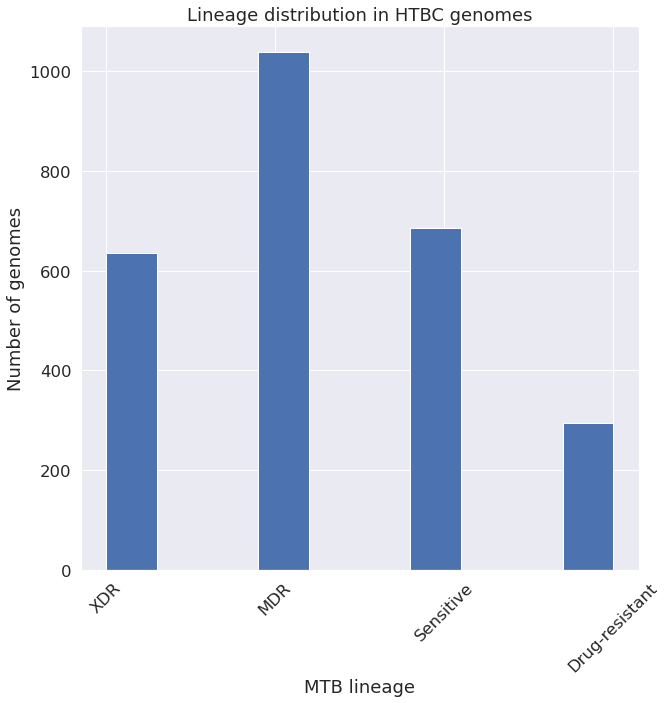

In [70]:
binarized_resistance_status_df['drtype'].hist(figsize=(10,10))

pyplot.xticks(rotation=45)
pyplot.title('Lineage distribution in HTBC genomes') 
pyplot.ylabel('Number of genomes') 
pyplot.xlabel('MTB lineage') 

In [42]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [44]:
tips.drop(columns=['tip', 'smoker', 'day', 'time'])

,total_bill,sex,size
0,16.99,Female,2
1,10.34,Male,3
2,21.01,Male,3
3,23.68,Male,2
4,24.59,Female,4
...,...,...,...
239,29.03,Male,3
240,27.18,Female,2
241,22.67,Male,2
242,17.82,Male,2


In [48]:
resistant_and_sensitive_genomes_list = [[800, 423,'TBP'], [338, 163,'HTBC']]

resistant_and_sensitive_genomes_df = pd.DataFrame(resistant_and_sensitive_genomes_list, columns=['Resistant', 'Sensitive', 'Group'])

resistant_and_sensitive_genomes_df

,Resistant,Sensitive,Group
0,800,423,TBP
1,338,163,HTBC


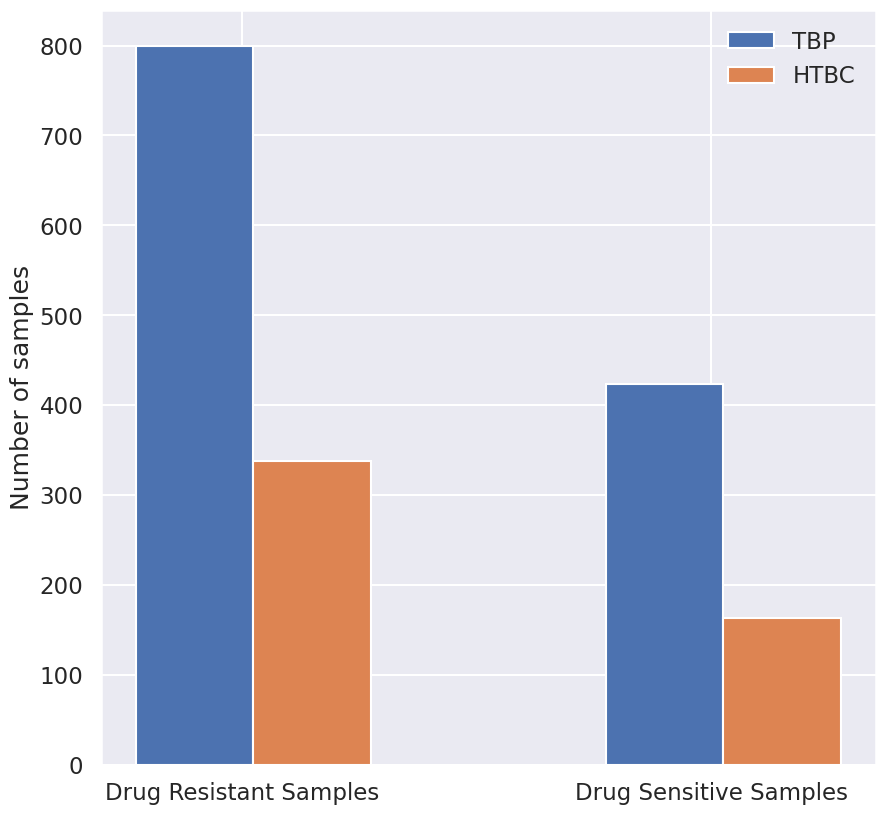

In [162]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 

plt.figure(
    figsize=(10,10),
    dpi=100)

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [800, 423]
bars2 = [338, 163]


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='TBP')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='HTBC')
 
# Add xticks on the middle of the group bars
# plt.xlabel('Cohort Drug Resistance Profile', fontweight='bold')
plt.xticks([r + 0.10 for r in range(len(bars1))], ['Drug Resistant Samples', 'Drug Sensitive Samples'])
# plt.xticks(rotation=45)

pyplot.ylabel('Number of samples') 


# Create legend & Show graphic
plt.legend()
plt.show()

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

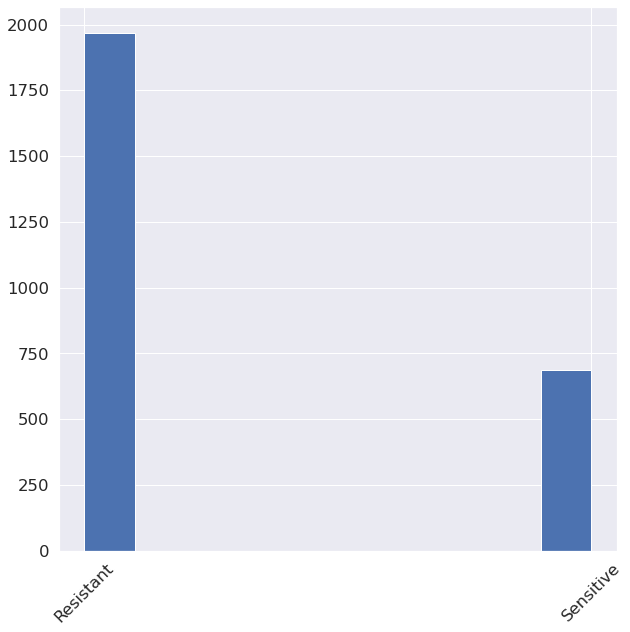

In [22]:
binarized_resistance_status_df['Resistance_Status'].hist(figsize=(10,10))
pyplot.xticks(rotation=45)
|

In [33]:
binarized_resistance_status_train_df['Resistance_Status'].value_counts()

Resistant    800
Sensitive    423
Name: Resistance_Status, dtype: int64

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

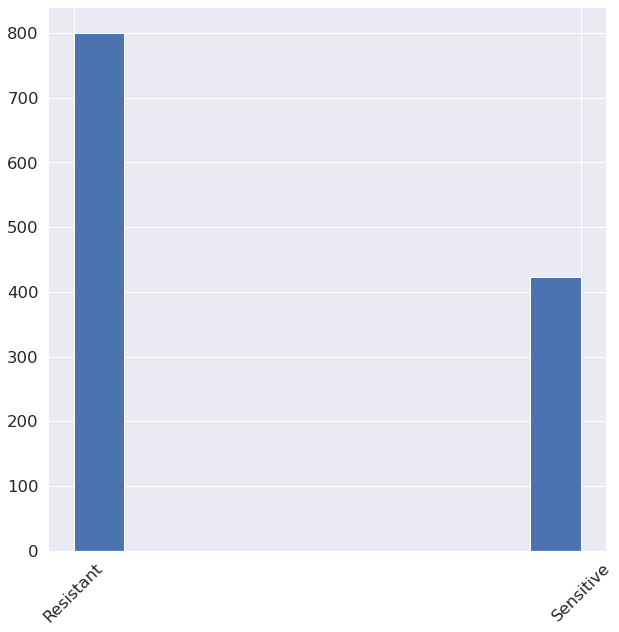

In [23]:
binarized_resistance_status_train_df['Resistance_Status'].hist(figsize=(10,10))
pyplot.xticks(rotation=45)


In [32]:
binarized_resistance_status_test_df['Resistance_Status'].value_counts()

Resistant    338
Sensitive    163
Name: Resistance_Status, dtype: int64

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

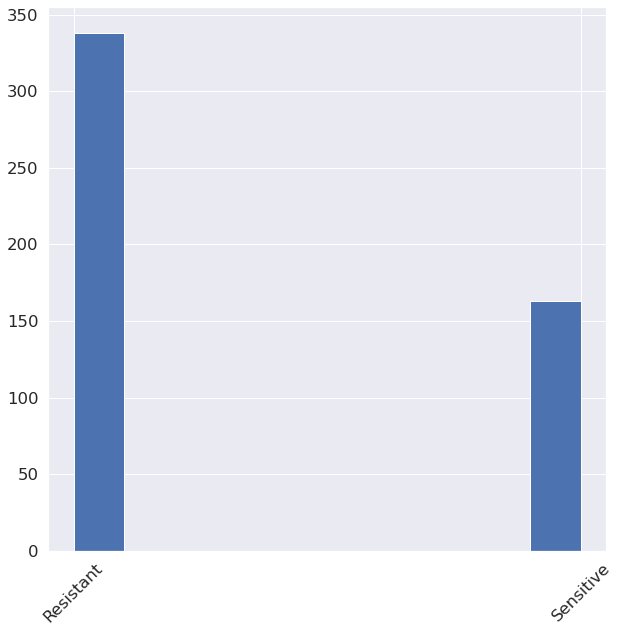

In [28]:
binarized_resistance_status_test_df['Resistance_Status'].hist(figsize=(10,10))
pyplot.xticks(rotation=45)


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

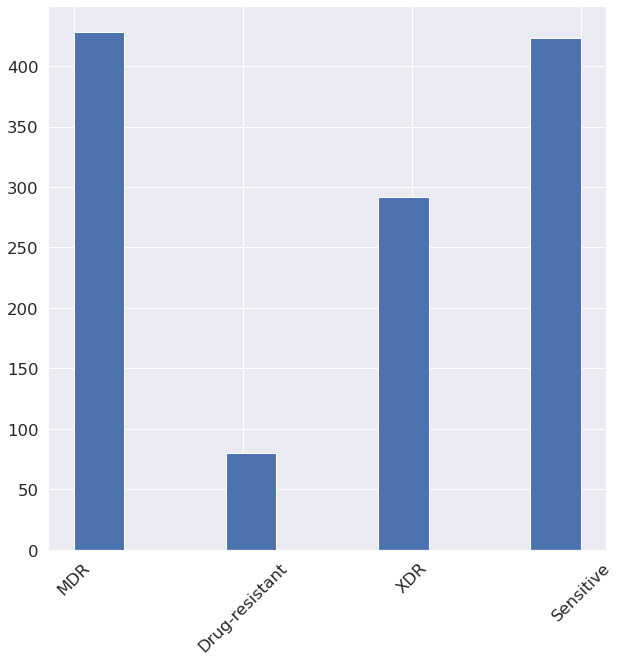

In [97]:
binarized_resistance_status_train_df['drtype'].hist(figsize=(10,10))

pyplot.xticks(rotation=45)


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

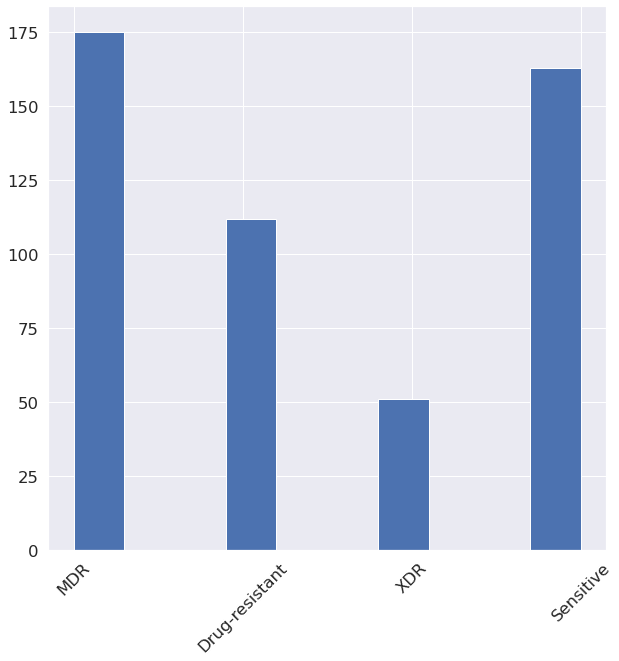

In [98]:
binarized_resistance_status_test_df['drtype'].hist(figsize=(10,10))

pyplot.xticks(rotation=45)


In [100]:
binarized_resistance_status_train_df['drtype'].value_counts()

MDR               428
Sensitive         423
XDR               292
Drug-resistant     80
Name: drtype, dtype: int64

In [101]:
binarized_resistance_status_test_df['drtype'].value_counts()

MDR               175
Sensitive         163
Drug-resistant    112
XDR                51
Name: drtype, dtype: int64

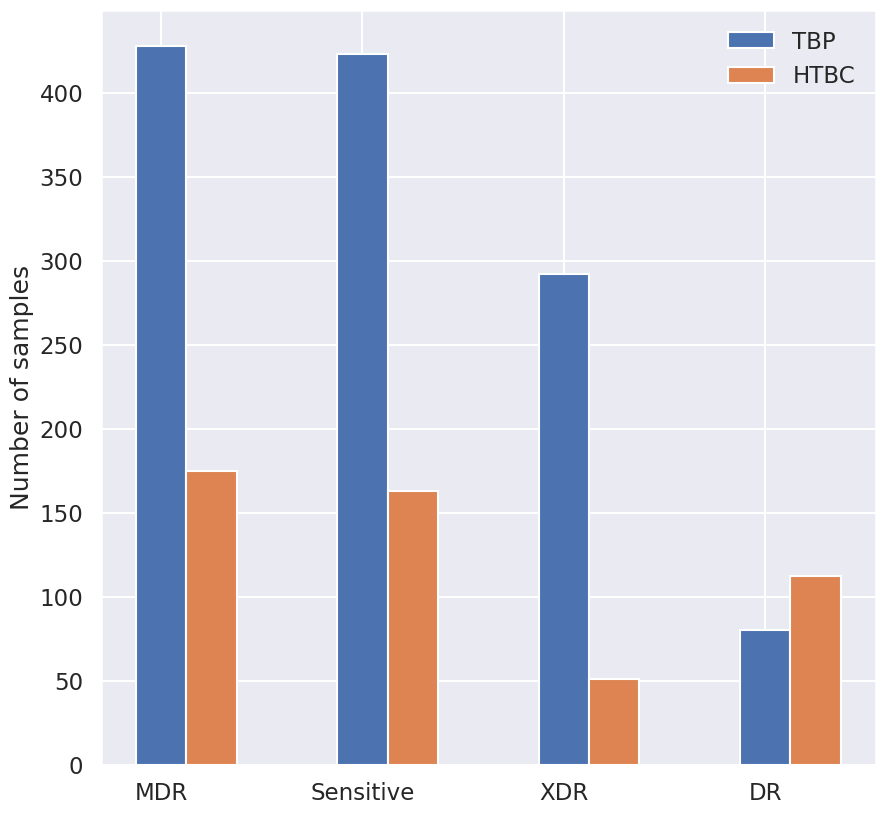

In [159]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 

plt.figure(
    figsize=(10,10),
    dpi=100)

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [428, 423, 292, 80]
bars2 = [175, 163, 51, 112]


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='TBP')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='HTBC')
 
# Add xticks on the middle of the group bars
# plt.xlabel('Cohort Drug Resistance Profile', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['MDR', 'Sensitive', 'XDR', 'DR'])
# plt.xticks(rotation=45)
pyplot.ylabel('Number of samples') 


# Create legend & Show graphic
plt.legend()
plt.show()

#### Lineage distribution


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

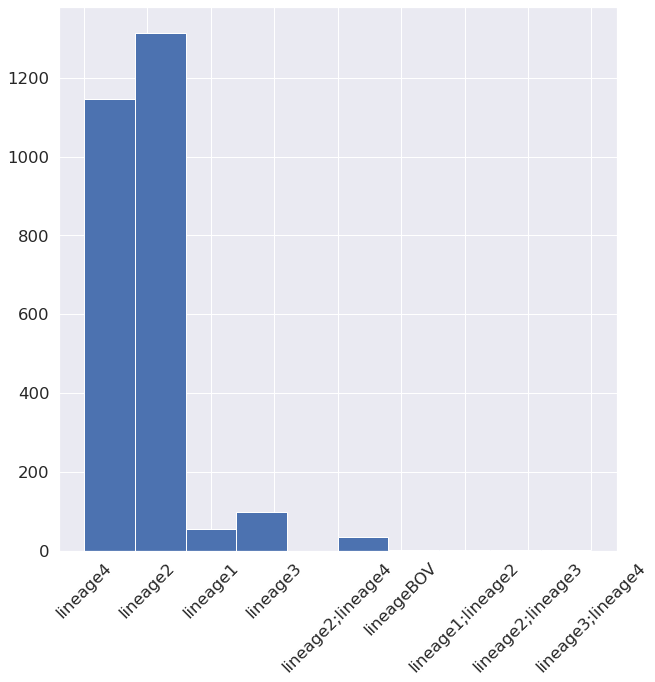

In [24]:
binarized_resistance_status_df['main_lin'].hist(figsize=(10,10))

pyplot.xticks(rotation=45)


Text(0.5, 0, 'MTB lineage')

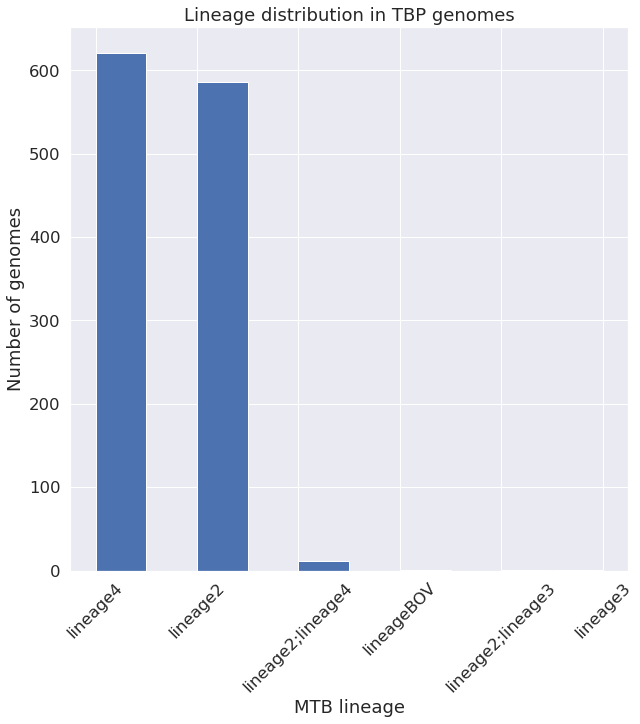

In [34]:
binarized_resistance_status_train_df['main_lin'].hist(figsize=(10,10))
pyplot.xticks(rotation=45)
pyplot.title('Lineage distribution in TBP genomes') 
pyplot.ylabel('Number of genomes') 
pyplot.xlabel('MTB lineage') 

Text(0.5, 0, 'MTB lineage')

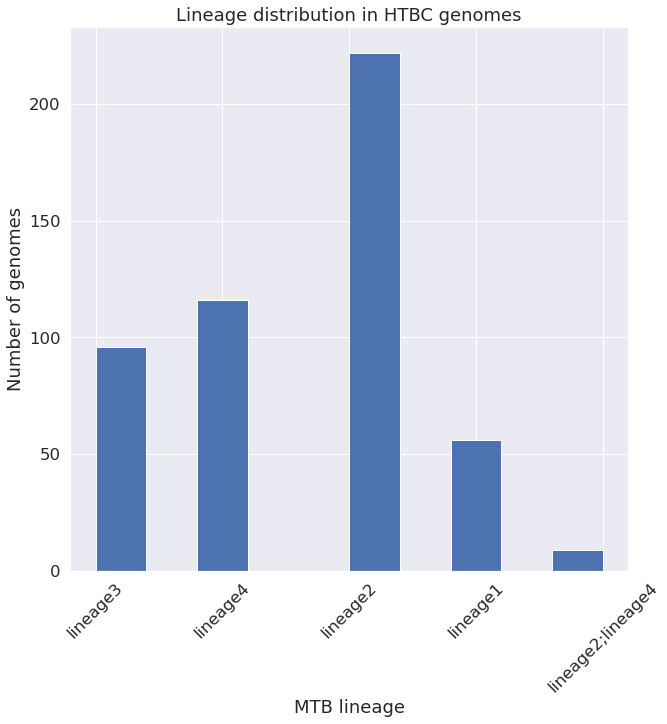

In [33]:
binarized_resistance_status_test_df['main_lin'].hist(figsize=(10,10))
pyplot.xticks(rotation=45)
pyplot.title('Lineage distribution in HTBC genomes') 
pyplot.ylabel('Number of genomes') 
pyplot.xlabel('MTB lineage') 

In [105]:
binarized_resistance_status_train_df['main_lin'].value_counts()

lineage4             621
lineage2             586
lineage2;lineage4     12
lineage2;lineage3      1
lineage3               1
lineageBOV             1
Name: main_lin, dtype: int64

In [106]:
binarized_resistance_status_test_df['main_lin'].value_counts()

lineage2             222
lineage4             116
lineage3              96
lineage1              56
lineage2;lineage4      9
Name: main_lin, dtype: int64

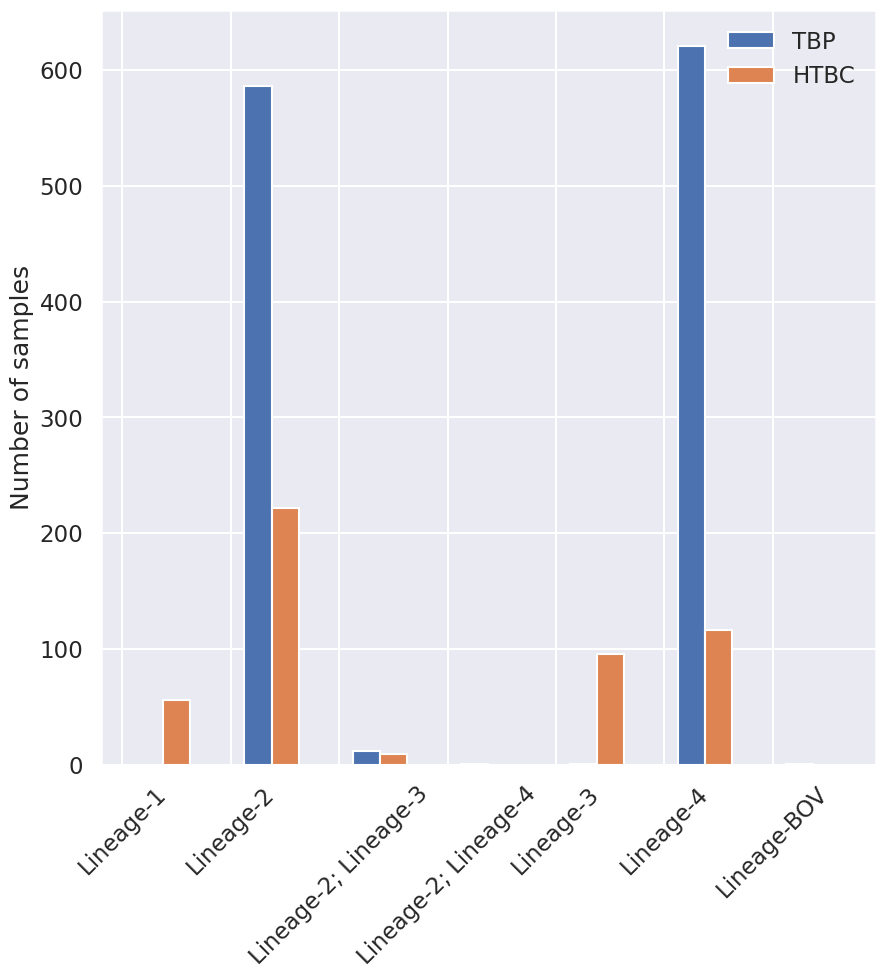

In [157]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 

plt.figure(
    figsize=(10,10),
    dpi=100)

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [0, 586, 12, 1, 1, 621, 1]
bars2 = [56, 222, 9, 0, 96, 116, 0]


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='TBP')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='HTBC')
 
# Add xticks on the middle of the group bars
# plt.xlabel('Cohort Drug Resistance Profile', fontweight='bold')
plt.xticks([r - barWidth for r in range(len(bars1))], ['Lineage-1', 'Lineage-2', 'Lineage-2; Lineage-3', 'Lineage-2; Lineage-4', 'Lineage-3', 'Lineage-4', 'Lineage-BOV'])
plt.xticks(rotation=45)

pyplot.ylabel('Number of samples') 

# Create legend & Show graphic
plt.legend()
plt.show()

#### Find the relationship between drtype and main_lin variables

In [20]:
binarized_resistance_status_train_df.groupby(['drtype','main_lin']).size()

drtype          main_lin         
Drug-resistant  lineage2              30
                lineage2;lineage4      1
                lineage4              48
                lineageBOV             1
MDR             lineage2             261
                lineage2;lineage3      1
                lineage2;lineage4      5
                lineage4             161
Sensitive       lineage2             125
                lineage3               1
                lineage4             296
XDR             lineage2             170
                lineage2;lineage4      6
                lineage4             116
dtype: int64

In [21]:
binarized_resistance_status_test_df.groupby(['drtype','main_lin']).size()

drtype          main_lin         
Drug-resistant  lineage1             14
                lineage2             62
                lineage3             11
                lineage4             25
MDR             lineage1              6
                lineage2             74
                lineage2;lineage4     6
                lineage3             51
                lineage4             38
Sensitive       lineage1             35
                lineage2             66
                lineage2;lineage4     2
                lineage3              9
                lineage4             49
XDR             lineage1              1
                lineage2             20
                lineage2;lineage4     1
                lineage3             25
                lineage4              4
dtype: int64

#### Stacked Column Chart: visual form of the two-way table


Text(0.5, 0, 'MTB lineage')

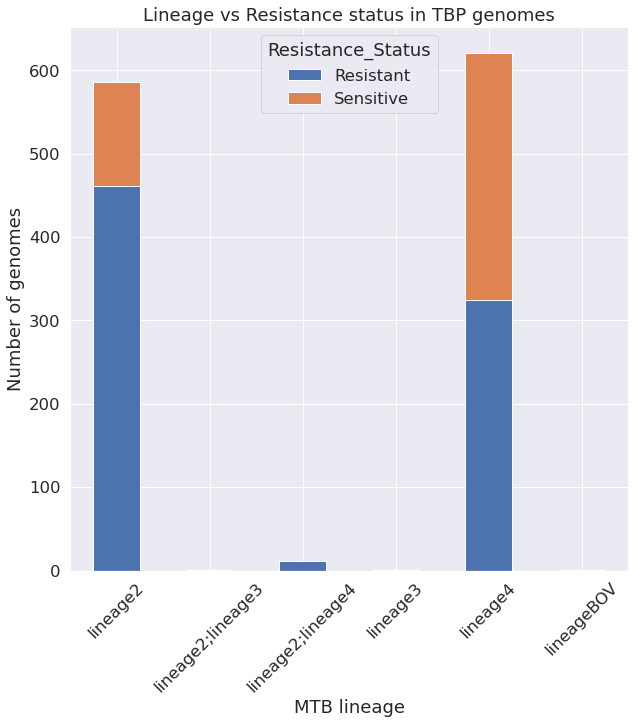

In [35]:
# binarized_resistance_status_train_df.groupby(['drtype','sublin']).size()

pd.crosstab(index= binarized_resistance_status_train_df['main_lin'], columns=binarized_resistance_status_train_df["Resistance_Status"]).plot(kind="bar", figsize=(10,10), stacked=True)
pyplot.xticks(rotation=45)
pyplot.title('Lineage vs Resistance status in TBP genomes') 
pyplot.ylabel('Number of genomes') 
pyplot.xlabel('MTB lineage') 

Text(0.5, 0, 'MTB lineage')

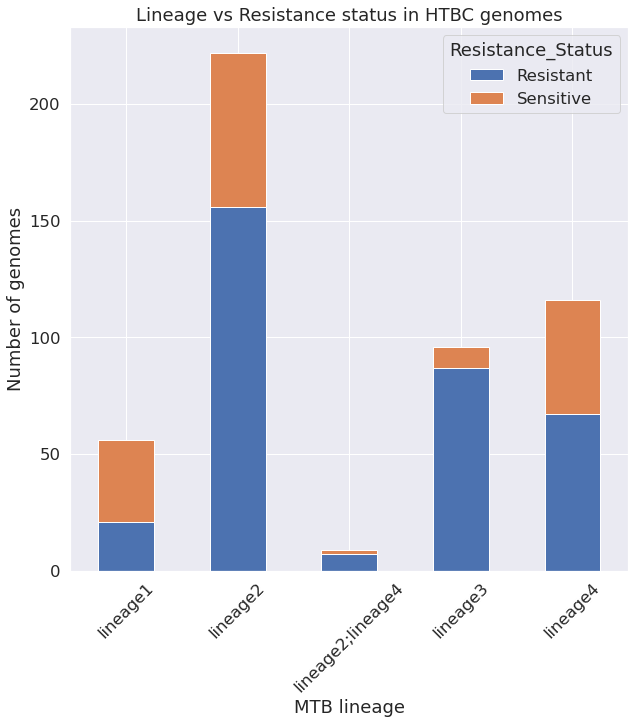

In [36]:
pd.crosstab(index= binarized_resistance_status_test_df['main_lin'], columns=binarized_resistance_status_test_df["Resistance_Status"]).plot(kind="bar", figsize=(10,10), stacked=True)

pyplot.xticks(rotation=45)
pyplot.title('Lineage vs Resistance status in HTBC genomes') 
pyplot.ylabel('Number of genomes') 
pyplot.xlabel('MTB lineage') 

In [124]:
pd.crosstab(index= binarized_resistance_status_train_df['main_lin'], columns=binarized_resistance_status_train_df["Resistance_Status"])

Resistance_Status,Resistant,Sensitive
main_lin,,
lineage2,461,125
lineage2;lineage3,1,0
lineage2;lineage4,12,0
lineage3,0,1
lineage4,325,296
lineageBOV,1,0


In [123]:
pd.crosstab(index= binarized_resistance_status_test_df['main_lin'], columns=binarized_resistance_status_test_df["Resistance_Status"])

Resistance_Status,Resistant,Sensitive
main_lin,,
lineage1,21,35
lineage2,156,66
lineage2;lineage4,7,2
lineage3,87,9
lineage4,67,49


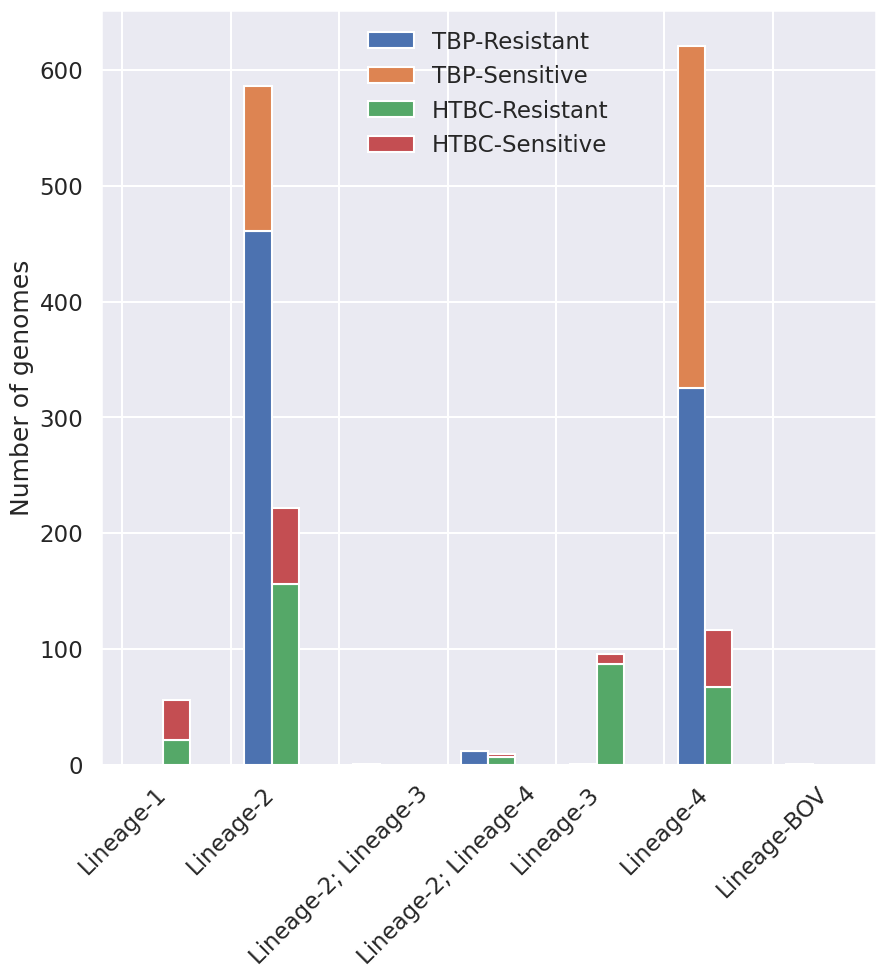

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 

 
plt.figure(
    figsize=(10,10),
    dpi=100)

# set width of bar
barWidth = 0.25
 


# TBP-Resistant
bars1 = [0, 461, 1, 12, 0, 325, 1]
# TBP-Sensitive
bars2 = [0, 125, 0, 0, 1, 296, 0]

# HTBC-Resistant
bars3 = [21, 156, 0, 7, 87, 67, 0]
# HTBC-Sensitive
bars4 = [35, 66, 0, 2, 9, 49, 0]


# Heights of bars1 + bars2
bars12_h = np.add(bars1, bars2).tolist()
bars34_h = np.add(bars3, bars4).tolist()
 


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 

# Create brown bars
plt.bar(r1, bars1, edgecolor='white', width=barWidth, label='TBP-Resistant')
# Create green bars (middle), on top of the firs ones
plt.bar(r1, bars2, bottom=bars1, edgecolor='white', width=barWidth, label='TBP-Sensitive')

 

# # Create brown bars
plt.bar(r2, bars3, edgecolor='white', width=barWidth, label='HTBC-Resistant')
# # Create green bars (middle), on top of the firs ones
plt.bar(r2, bars4, bottom=bars3, edgecolor='white', width=barWidth, label='HTBC-Sensitive')

 

# Custom X axis
plt.xticks([r1 - barWidth for r1 in range(len(bars1))], ['Lineage-1', 'Lineage-2', 'Lineage-2; Lineage-3', 'Lineage-2; Lineage-4', 'Lineage-3', 'Lineage-4', 'Lineage-BOV'])

plt.xticks(rotation=45)

 
pyplot.ylabel('Number of genomes') 


# Show graphic
plt.legend()
plt.show()

In [142]:
r

[0, 0.25, 2, 3, 4]

## EDA for genomic pre-processing results


In [38]:
import json
import ast

with open("../../data/interim/final.cols_with_mutations_dict.txt") as f:
    position_variants_dict = ast.literal_eval(f.read())

position_variants_dict

{'NC000962_3.11': {'A/A': 1721, './.': 3, 'C/C': 1},
 'NC000962_3.22': {'G/G': 1721, './.': 3, 'G/C': 1},
 'NC000962_3.79': {'G/G': 1720, './.': 3, 'C/C': 2},
 'NC000962_3.180': {'T/T': 1720, './.': 4, 'C/C': 1},
 'NC000962_3.305': {'C/C': 1722, './.': 2, 'T/T': 1},
 'NC000962_3.371': {'C/C': 1709, 'T/T': 13, './.': 3},
 'NC000962_3.391': {'G/G': 1721, './.': 3, 'A/A': 1},
 'NC000962_3.434': {'A/A': 1710, 'G/G': 9, './.': 4, 'A/G': 2},
 'NC000962_3.453': {'C/C': 1720, './.': 4, 'G/G': 1},
 'NC000962_3.467': {'A/A': 1721, './.': 3, 'G/G': 1},
 'NC000962_3.524': {'A/A': 1723, './.': 1, 'A/C': 1},
 'NC000962_3.633': {'T/T': 1721, './.': 3, 'C|C': 1},
 'NC000962_3.639': {'C/C': 1722, './.': 2, 'T|T': 1},
 'NC000962_3.645': {'A/A': 1721, './.': 3, 'A|G': 1},
 'NC000962_3.648': {'C/C': 1722, './.': 2, 'C|T': 1},
 'NC000962_3.654': {'A/A': 1721, './.': 3, 'A|G': 1},
 'NC000962_3.658': {'G/G': 1722, './.': 2, 'T/T': 1},
 'NC000962_3.666': {'C/C': 1722, './.': 2, 'C|G': 1},
 'NC000962_3.669': {

In [39]:
unique_variants_count_list= []


for a_key in list(position_variants_dict.keys()):
    unique_variants_count_list.append(len(position_variants_dict[a_key]))

unique_variants_count_list[:10]

[3, 3, 3, 3, 3, 3, 3, 4, 3, 3]

In [5]:
len(unique_variants_count_list)

142326

In [40]:
import pandas as pd
unique_variants_count_series = pd.Series(unique_variants_count_list)

Text(0.5, 0, 'Number of unique mutations')

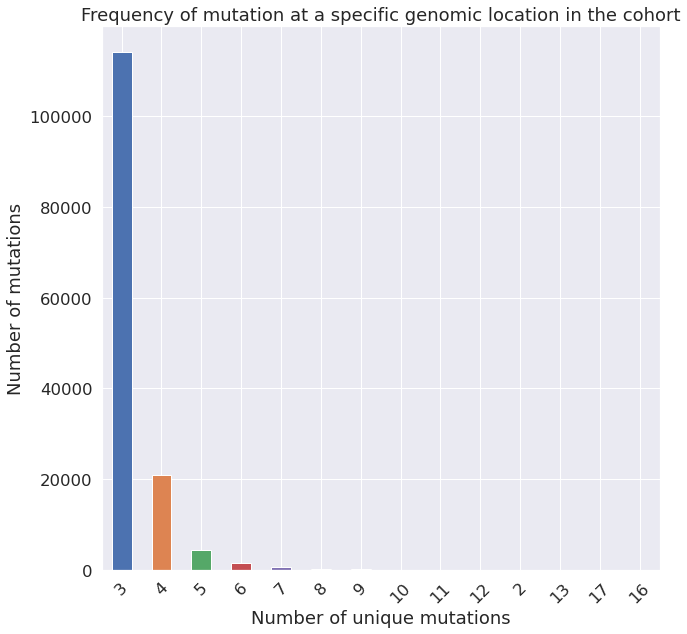

In [41]:
unique_variants_count_series.value_counts().plot(kind='bar', figsize=(10,10))
pyplot.xticks(rotation=45)
pyplot.title('Frequency of mutation at a specific genomic location in the cohort') 
pyplot.ylabel('Number of mutations') 
pyplot.xlabel('Number of unique mutations') 

In [25]:
unique_variants_count_series.value_counts()

3     114183
4      21008
5       4410
6       1540
7        716
8        274
9        105
10        45
11        20
12        13
2          6
13         4
17         1
16         1
dtype: int64

In [48]:
unique_variants_count_series_dict= unique_variants_count_series.value_counts().to_dict()
unique_variants_count_series_dict

{3: 114183,
 4: 21008,
 5: 4410,
 6: 1540,
 7: 716,
 8: 274,
 9: 105,
 10: 45,
 11: 20,
 12: 13,
 2: 6,
 13: 4,
 17: 1,
 16: 1}

Text(0.5, 0, 'Number of unique mutations')

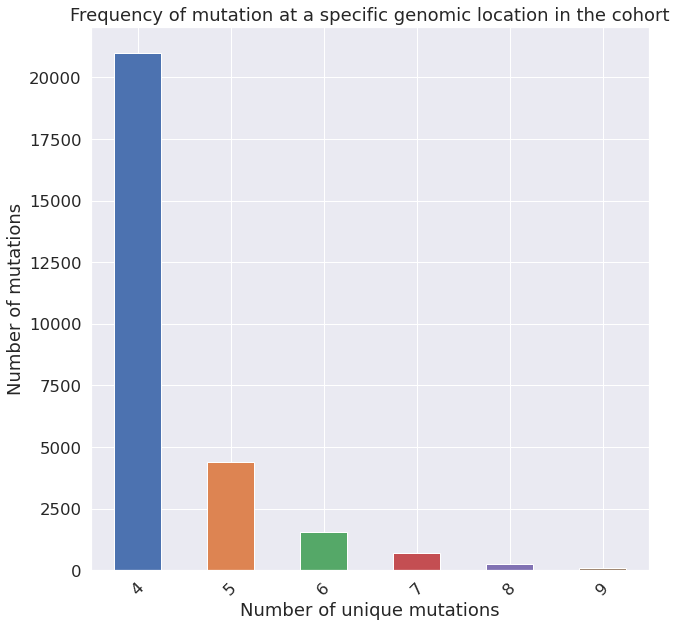

In [49]:
# Remove all SMALL mutations

del unique_variants_count_series_dict[3] # EXCEPTION
del unique_variants_count_series_dict[2]
del unique_variants_count_series_dict[10]
del unique_variants_count_series_dict[11]
del unique_variants_count_series_dict[12]
del unique_variants_count_series_dict[13]
del unique_variants_count_series_dict[16]
del unique_variants_count_series_dict[17]


pd.Series(unique_variants_count_series_dict).plot(kind='bar', figsize=(10,10))
pyplot.xticks(rotation=45)
pyplot.title('Frequency of mutation at a specific genomic location in the cohort') 
pyplot.ylabel('Number of mutations') 
pyplot.xlabel('Number of unique mutations') 

Text(0.5, 0, 'Number of unique mutations')

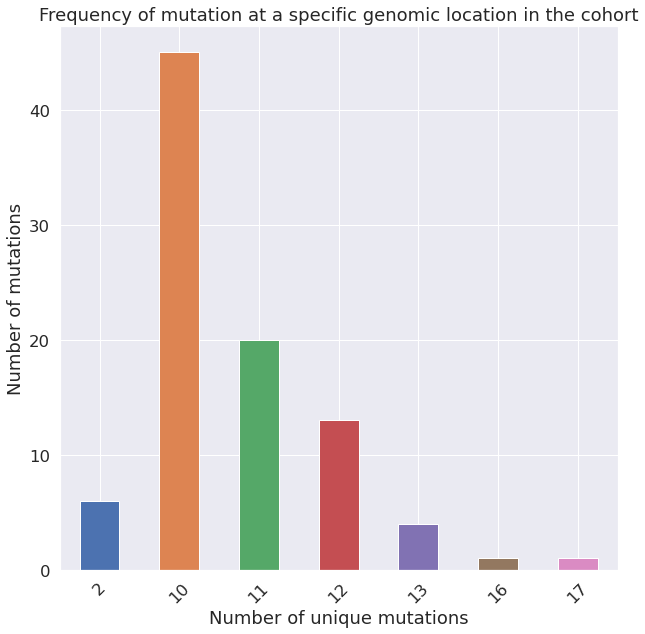

In [44]:
# Remove all BIG mutations

del unique_variants_count_series_dict[3]
del unique_variants_count_series_dict[4]
del unique_variants_count_series_dict[5]
del unique_variants_count_series_dict[6]
del unique_variants_count_series_dict[7]
del unique_variants_count_series_dict[8]
del unique_variants_count_series_dict[9]


pd.Series(unique_variants_count_series_dict).plot(kind='bar', figsize=(10,10))
pyplot.xticks(rotation=45)
pyplot.title('Frequency of mutation at a specific genomic location in the cohort') 
pyplot.ylabel('Number of mutations') 
pyplot.xlabel('Number of unique mutations') 

## EDA on the final binarized dataset 

In [165]:
binarized_final_df = pd.read_csv("../../data/processed/final.binarized_final_monolabel_df.tsv", "\t", index_col='SampleID')
binarized_final_df.head()

,NC000962_3.22,NC000962_3.434,NC000962_3.524,NC000962_3.645,NC000962_3.648,NC000962_3.654,NC000962_3.666,NC000962_3.675,NC000962_3.678,NC000962_3.693,...,NC000962_3.4410251,NC000962_3.4410260,NC000962_3.4410272,NC000962_3.4410278,NC000962_3.4410728,NC000962_3.4410850,NC000962_3.4411016,NC000962_3.4411170,NC000962_3.4411327,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
ERR027458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
ERR027459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
ERR027460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ERR027461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ERR027462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [166]:
mutation_counts_df = binarized_final_df.drop(['Resistance_Status'], axis=1).sum(axis=1).to_frame().rename(columns= {0: 'Mutation_Count'})
mutation_counts_df.head()

,Mutation_Count
SampleID,
ERR027458,98
ERR027459,118
ERR027460,0
ERR027461,0
ERR027462,96


In [167]:
mutation_counts_df = mutation_counts_df.join(binarized_final_df['Resistance_Status'])
mutation_counts_df

,Mutation_Count,Resistance_Status
SampleID,,
ERR027458,98,1.0
ERR027459,118,1.0
ERR027460,0,0.0
ERR027461,0,0.0
ERR027462,96,0.0
...,...,...
SRR9738535,404,1.0
SRR9738538,403,1.0
SRR9738554,376,1.0


Text(0.5, 0, 'Cohort samples')

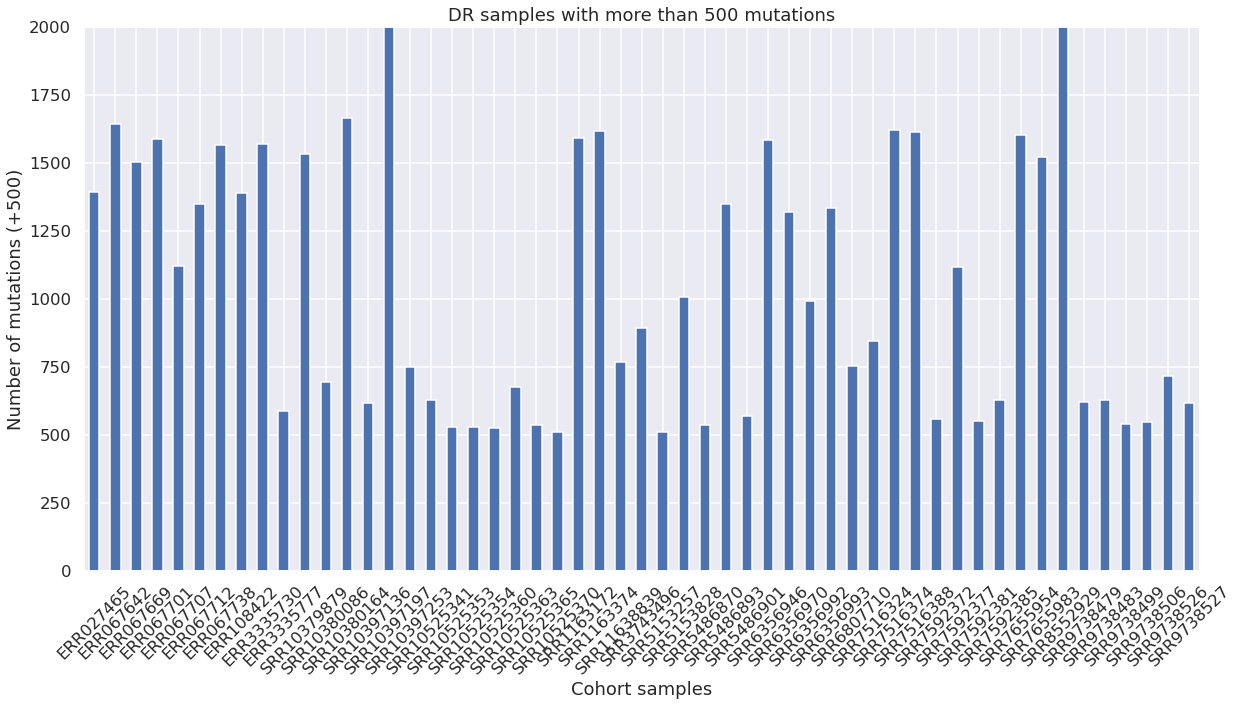

In [169]:
resistant_mutation_counts_df = mutation_counts_df[mutation_counts_df.Resistance_Status == 1.0]['Mutation_Count']

resistant_mutation_counts_df[resistant_mutation_counts_df > 500].plot(kind='bar',figsize=(20,10), ylim=[0, 2000])

pyplot.xticks(rotation=45)
pyplot.title('DR samples with more than 500 mutations') 
pyplot.ylabel('Number of mutations (+500)') 
pyplot.xlabel('Cohort samples') 


In [170]:
resistant_mutation_counts_df[resistant_mutation_counts_df > 500].describe()

count      53.000000
mean     1131.415094
std       876.055395
min       510.000000
25%       615.000000
50%       894.000000
75%      1532.000000
max      6473.000000
Name: Mutation_Count, dtype: float64

In [171]:
resistant_mutation_counts_df[resistant_mutation_counts_df > 500].median()

894.0

<AxesSubplot:>

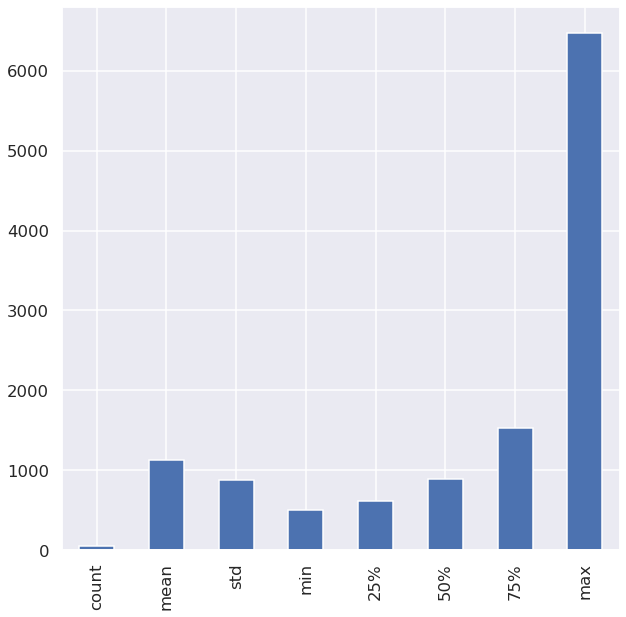

In [172]:
resistant_mutation_counts_df[resistant_mutation_counts_df > 500].describe().plot(kind='bar', figsize=(10,10))

Text(0.5, 0, 'Cohort samples')

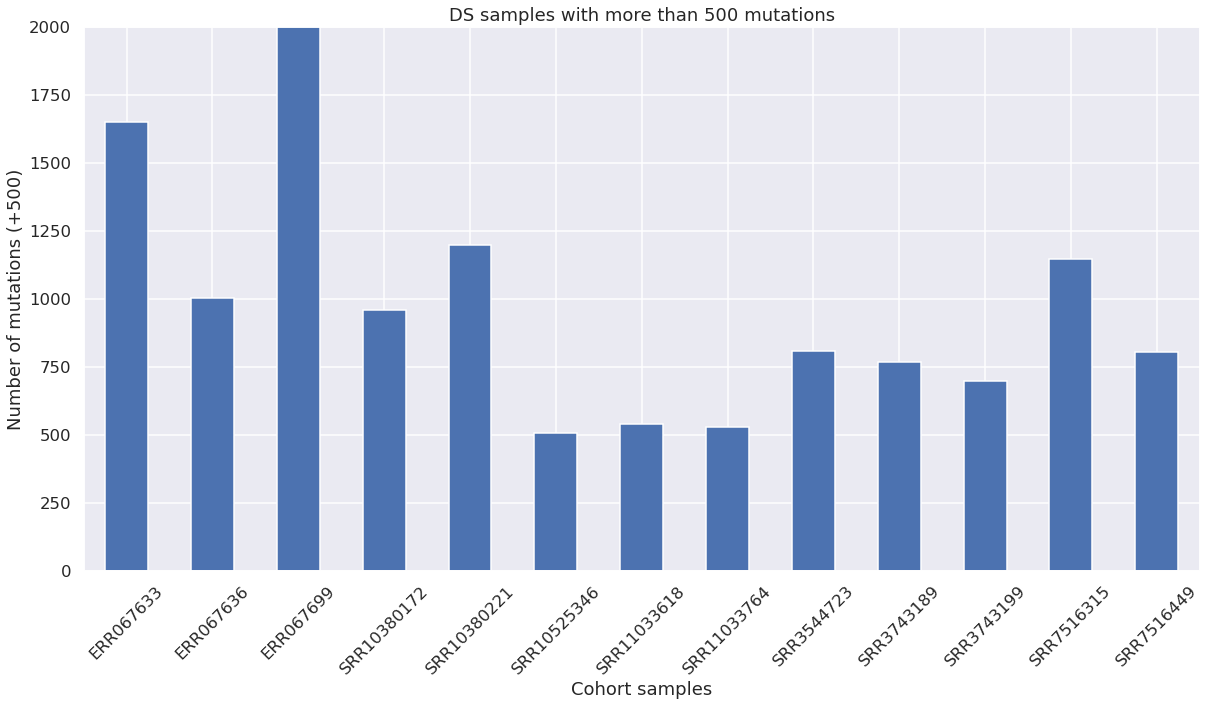

In [173]:
sensitive_mutation_counts_df= mutation_counts_df[mutation_counts_df.Resistance_Status == 0]['Mutation_Count']

sensitive_mutation_counts_df[sensitive_mutation_counts_df > 500].plot(kind='bar', figsize=(20,10), ylim=[0, 2000])
pyplot.xticks(rotation=45)
pyplot.title('DS samples with more than 500 mutations') 
pyplot.ylabel('Number of mutations (+500)') 
pyplot.xlabel('Cohort samples') 


<AxesSubplot:>

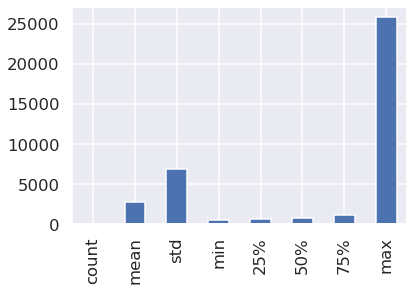

In [191]:
sensitive_mutation_counts_df[sensitive_mutation_counts_df > 500].describe().plot(kind='bar')

In [174]:
resistant_mutation_counts_df[resistant_mutation_counts_df > 500].describe()

count      53.000000
mean     1131.415094
std       876.055395
min       510.000000
25%       615.000000
50%       894.000000
75%      1532.000000
max      6473.000000
Name: Mutation_Count, dtype: float64

In [175]:
sensitive_mutation_counts_df[sensitive_mutation_counts_df > 500].describe()

count       13.000000
mean      2804.000000
std       6932.112905
min        505.000000
25%        696.000000
50%        808.000000
75%       1145.000000
max      25851.000000
Name: Mutation_Count, dtype: float64

In [180]:
resistant_mutation_counts_df[resistant_mutation_counts_df > 500].median()

894.0

In [181]:
sensitive_mutation_counts_df[sensitive_mutation_counts_df > 500].median()

808.0

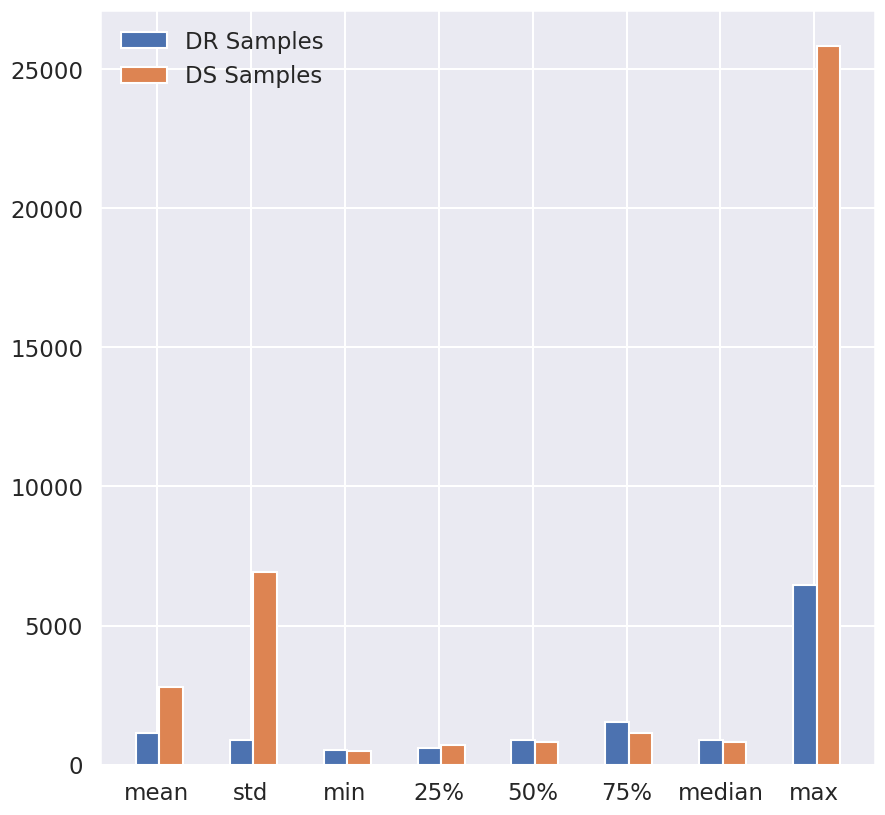

In [187]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 

plt.figure(
    figsize=(10,10),
    dpi=100)

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [# 53, 
            1131.415, 876.055, 510, 615, 894, 1532, 894, 6473]
bars2 = [# 13, 
            2804, 6932.112, 505, 696, 808, 1145, 808, 25851]


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='DR Samples')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='DS Samples')
 
# Add xticks on the middle of the group bars
# plt.xlabel('Cohort Drug Resistance Profile', fontweight='bold')
plt.xticks([r + 0.10 for r in range(len(bars1))], [#'count', 
                                                    'mean', 'std', 'min', '25%', '50%', '75%', 'median', 'max'])
# plt.xticks(rotation=45)

# pyplot.xlabel('Statistics for samples with 500+ mutations') 


# Create legend & Show graphic
plt.legend()
plt.show()

<AxesSubplot:>

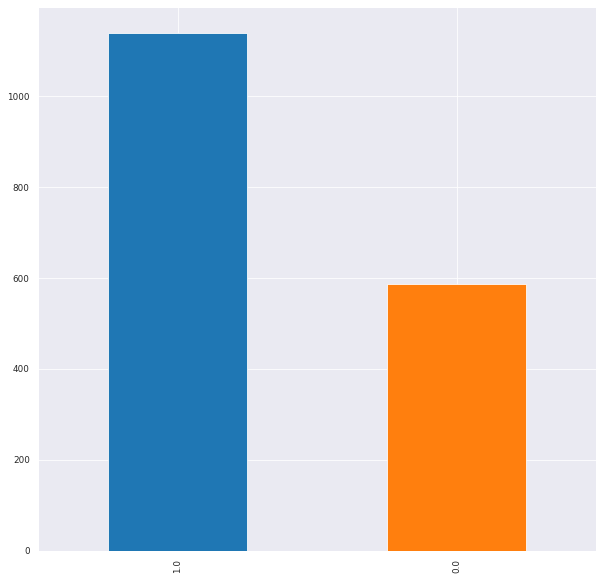

In [151]:
mutation_counts_df['Resistance_Status'].value_counts().plot(kind='bar', figsize=(10,10))